## Quick comparison of scenarios

This notebook create graphs and tables to answer following questions:
- What could be the evolution of actual energy consumption?
- How many renovation (of at least 1 EPC) could there be by 2050?
- What could be the evolution of stock energy performance by 2050?
- What could be the heating intensity by 2050?
- How many energy poverty households could there be by 2050?

In [1]:
name_folder = '../output/scenarios_input_2012'

### Code

In [2]:
import os
import pickle
import matplotlib.pyplot as plt
# from itertools import product
import numpy as np
import seaborn as sns
import sys
import json

sys.path.insert(0, "..")

from ui_utils import *

In [3]:
name_file = os.path.join('input', 'colors.json')
with open(name_file) as file:
    colors = json.load(file)

In [4]:
scenarios = [f for f in os.listdir(os.path.join(name_folder)) if os.path.isdir(os.path.join(name_folder, f))]
folders = {scenario: os.path.join(name_folder, scenario) for scenario in scenarios} 

In [5]:
sns.set_palette(sns.color_palette('husl', len(scenarios)))

In [6]:
summaries = {scenario: pd.read_csv(os.path.join(folders[scenario], 'summary.csv'), index_col=[0]) for scenario in scenarios}
summaries = reverse_nested_dict(summaries)
summaries = {key: pd.DataFrame(item) for key, item in summaries.items()}

In [7]:
output_stock = {scenario: pickle.load(open(os.path.join(folders[scenario], 'output_stock.pkl'), 'rb')) for scenario in scenarios}
output_stock = reverse_nested_dict(output_stock)

**User need to enter folder's name of Res-IRF ouput in the following cell**:

## Actual energy consumption

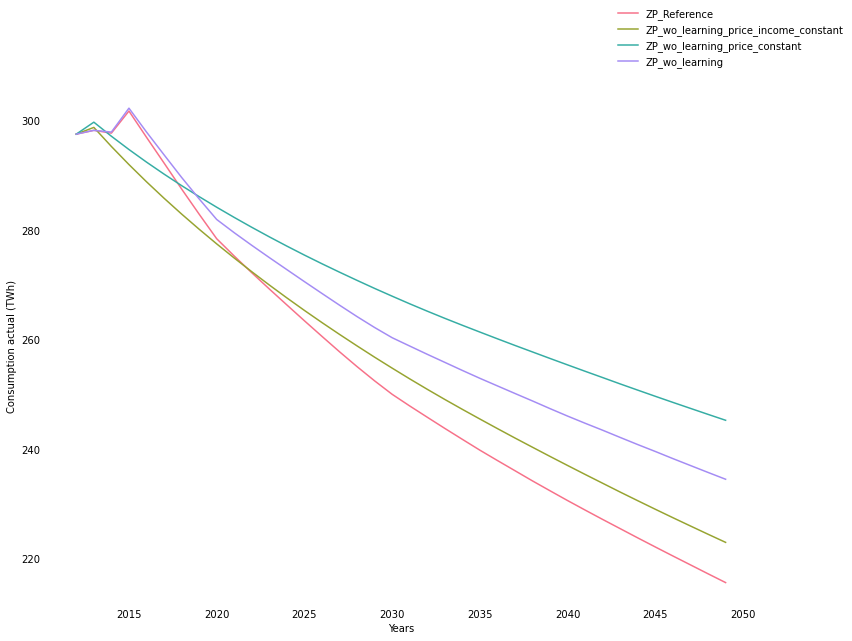

In [8]:
simple_pd_plot(summaries['Consumption actual (kWh)'] / 10**9, 'Years', 'Consumption actual (TWh)')

## Heating intensity

In [9]:
summaries.keys()

dict_keys(['Stock', 'Consumption conventional - wo/ calibration (kWh)', 'Consumption actual - wo/ calibration (kWh)', 'Consumption conventional (kWh)', 'Consumption actual (kWh)', 'Emission (gCO2)', 'Heating intensity renovation (%)', 'Flow transition renovation', 'Aggregated renovation rate renovation (%)', 'Annual renovation expenditure (€)', 'Annual subsidies (€)', 'Energy poverty', 'Energy taxes (€)', 'Cee taxes (€)', 'Carbon tax (€)'])

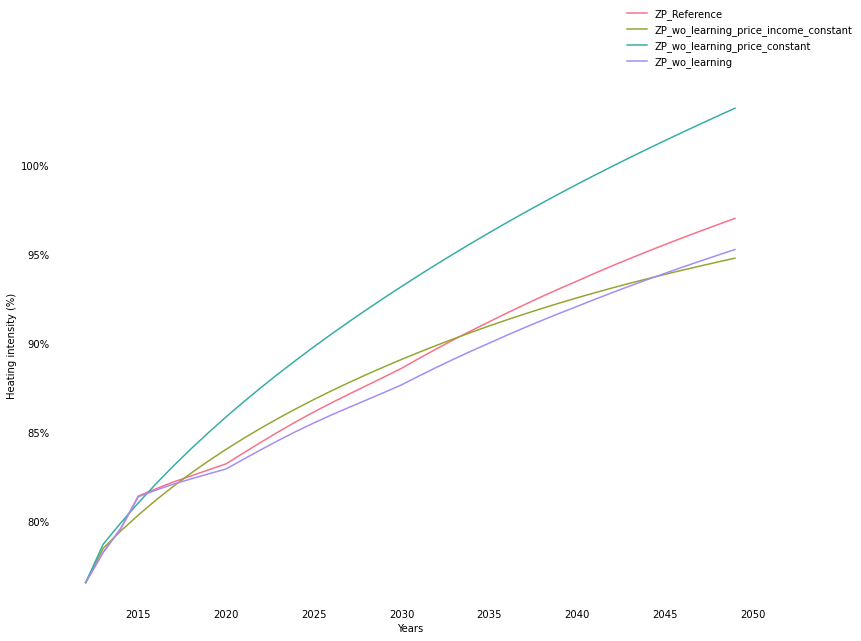

In [10]:
simple_pd_plot(summaries['Heating intensity renovation (%)'], 'Years', 'Heating intensity (%)', format_y='percent')

### Flow renovation

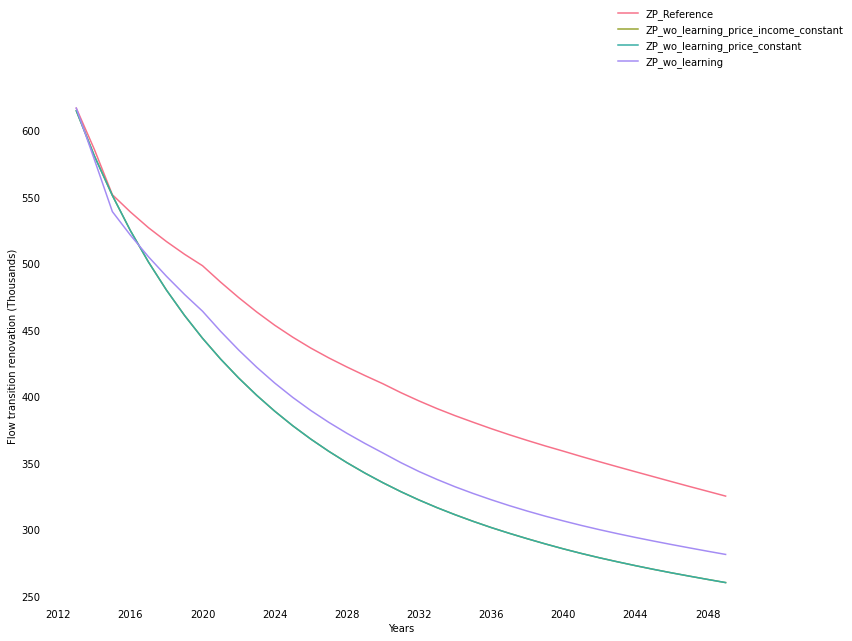

In [11]:
simple_pd_plot(summaries['Flow transition renovation'] / 10**3, 'Years', 'Flow transition renovation (Thousands)')

### Building stock energy performance

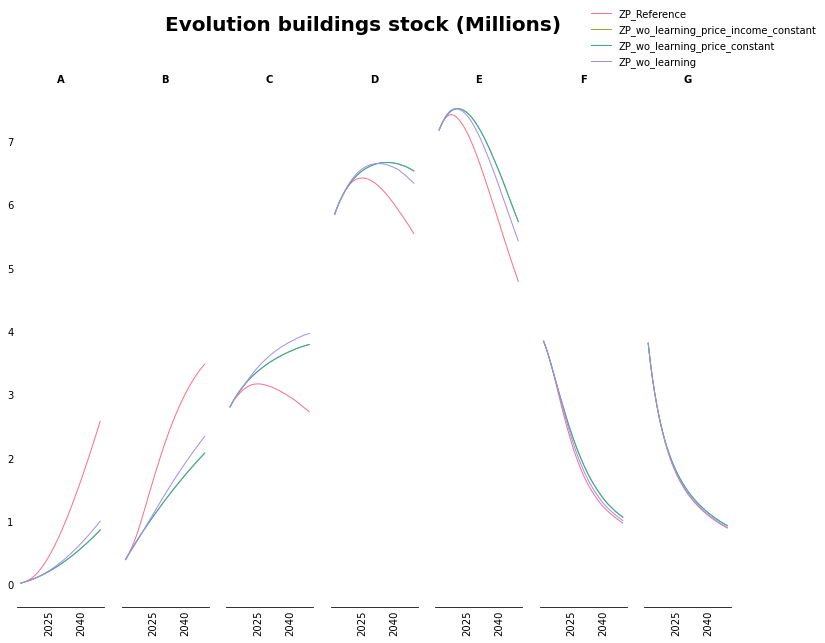

In [12]:
scenario_grouped_subplots(grouped_scenarios(output_stock['Stock - Renovation'], 'Energy performance'), suptitle='Evolution buildings stock (Millions)', format_y=lambda y, _: '{:,.0f}'.format(y/10**6), n_columns=7, rotation=90, nbins=4)

#### Energy poverty

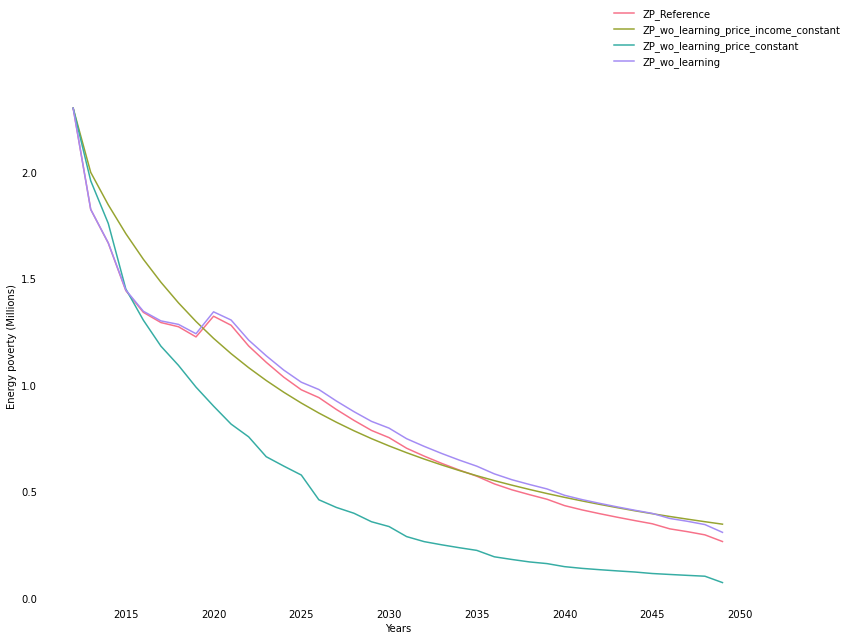

In [13]:
simple_pd_plot(summaries['Energy poverty'] / 10**6, 'Years', 'Energy poverty (Millions)')